Setup do ambiente
- Ferramentas
    - virtualenv
    - pyenv
- Comandos
    - virtualenv -p ~/.pyenv/versions/3.10.8/bin/python venv
    - source venv/bin/activate
    - pip install jupyter seaborn statsmodels pandas
    - jupyter notebook

In [1]:
!tree

.
├── hopi-hari.ipynb
├── README.md
├── ride-data
│   ├── Autopista
│   │   ├── autopista-abril.csv
│   │   ├── autopista-fevereiro.csv
│   │   ├── autopista-janeiro.csv
│   │   ├── autopista-julho.csv
│   │   ├── autopista-junho.csv
│   │   ├── autopista-maio.csv
│   │   └── autopista-marco.csv
│   ├── BabyElefante
│   │   ├── babyelefante-abril.csv
│   │   ├── babyelefante-fevereiro.csv
│   │   ├── babyelefante-janeiro.csv
│   │   ├── babyelefante-julho.csv
│   │   ├── babyelefante-junho.csv
│   │   ├── babyelefante-maio.csv
│   │   └── babyelefante-marco.csv
│   ├── BarcoPirata
│   │   ├── barcopirata-abril.csv
│   │   ├── barcopirata-fevereiro.csv
│   │   ├── barcopirata-janeiro.csv
│   │   ├── barcopirata-julho.csv
│   │   ├── barcopirata-junho.csv
│   │   ├── barcopirata-maio.csv
│   │   └── barcopirata-marco.csv
│   ├── BetinhoCarrero4D
│   │   ├── betinho4d-abril.csv
│   │   ├── betinho4d-fevereiro.csv
│   │   ├── betinho4d-janeiro.csv
│   │   ├── betinho4d-julho.csv
│   │   ├─

In [17]:
!pip list

Package                   Version
------------------------- -----------
anyio                     3.7.1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.2.3
asttokens                 2.2.1
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.12.1
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    6.0.0
certifi                   2023.7.22
cffi                      1.15.1
charset-normalizer        3.2.0
comm                      0.1.4
contourpy                 1.1.0
cycler                    0.11.0
debugpy                   1.6.7.post1
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup            1.1.3
executing                 1.2.0
fastjsonschema            2.18.0
fonttools                 4.42.1
fqdn                      1.5.1
idna                      3.4
ipykernel                 6.25.1
ipython                   8.14.0
ipython-genut

In [3]:
import pandas as pd
import seaborn as sns

In [81]:
def read_ride(ride, month):
    return (
        pd
        .read_csv(f"ride-data/{ride}/{ride.lower()}-{month}.csv",)
        .rename(columns={'Ride': 'ride', 'Date/Time': 'timestamp', 'Wait Time': 'wait'})
        .assign(timestamp=lambda x: pd.to_datetime(x.timestamp))
        .assign(day=lambda x: x.timestamp.dt.day)
        .assign(hour=lambda x: x.timestamp.dt.hour)# + x.timestamp.dt.minute/60)
    )

rides = ['TigorMountain', 'Tchibum', 'FerroviaDinomagic', 'XicarasMalucas']
month = 'abril'


df = pd.concat([read_ride(r, month) for r in rides])
df.head()

,ride,timestamp,wait,day,hour
0,Tigor Mountain,2023-04-01 10:45:04,25,1,10
1,Tigor Mountain,2023-04-01 10:50:04,25,1,10
2,Tigor Mountain,2023-04-01 10:55:04,25,1,10
3,Tigor Mountain,2023-04-01 11:00:04,25,1,11
4,Tigor Mountain,2023-04-01 11:05:03,25,1,11


In [7]:
len(df)

1634

In [48]:
df.groupby('day').count()

,ride,timestamp,wait,hour
day,,,,
1,91,91,91,91
4,89,89,89,89
5,91,91,91,91
6,90,90,90,90
7,88,88,88,88
10,90,90,90,90
11,91,91,91,91
12,91,91,91,91
13,99,99,99,99


<Axes: xlabel='hour', ylabel='wait'>

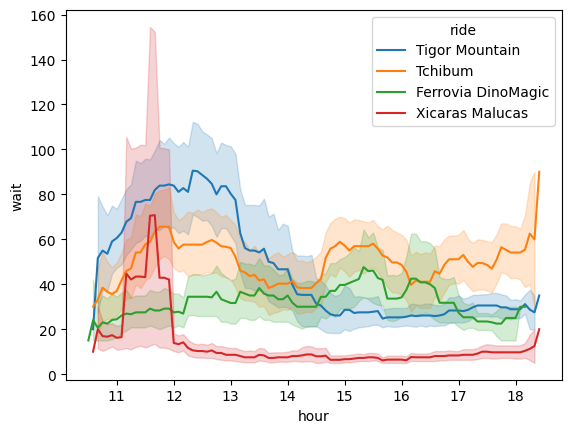

In [72]:
sns.lineplot(x='hour', y='wait', data=df, hue='ride')

<Axes: xlabel='hour', ylabel='wait'>

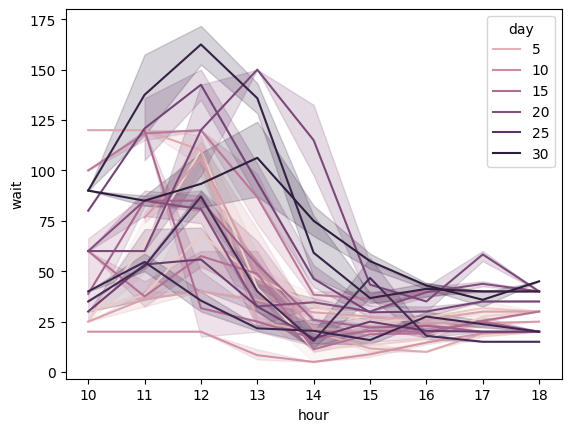

In [85]:
sns.lineplot(x='hour', y='wait', data=df[df.ride == 'Tigor Mountain'], hue='day')

In [75]:
df[(df.ride == 'Xicaras Malucas') & (df.wait > 100)]

,ride,timestamp,wait,day,hour
177,Xicaras Malucas,2023-04-04 11:35:04,600,4,11.583333
178,Xicaras Malucas,2023-04-04 11:40:04,600,4,11.666667
533,Xicaras Malucas,2023-04-11 11:10:06,550,11,11.166667
534,Xicaras Malucas,2023-04-11 11:15:04,550,11,11.250000
535,Xicaras Malucas,2023-04-11 11:20:04,550,11,11.333333
536,Xicaras Malucas,2023-04-11 11:25:05,550,11,11.416667
537,Xicaras Malucas,2023-04-11 11:30:04,550,11,11.500000
538,Xicaras Malucas,2023-04-11 11:35:04,550,11,11.583333
539,Xicaras Malucas,2023-04-11 11:40:04,550,11,11.666667
540,Xicaras Malucas,2023-04-11 11:45:05,550,11,11.750000


In [77]:
import statsmodels as sm
import statsmodels.formula.api as smf

In [84]:
smf.ols(formula='wait ~ C(hour)', data=df[df.ride == 'Tigor Mountain']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wait   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     113.0
Date:                Mon, 28 Aug 2023   Prob (F-statistic):          7.83e-150
Time:                        21:27:46   Log-Likelihood:                -7776.6
No. Observations:                1615   AIC:                         1.557e+04
Df Residuals:                    1606   BIC:                         1.562e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        54.7959      4.277     12.813      0.000      46.408      63.184
C(hour)[T.11]    20.6013      4.741      4.345      0.000      11.302      29.901
C(hour)[T.12]    29.9726      4.737      6.327      0.000      20.681      39.264
C(hour)[T.13]     2.6578      4.737      0.561      0.575      -6.633      11.949
C(hour)[T.14]   -21.7172      4.737     -4.585      0.000     -31.008     -12.426
C(hour)[T.15]   -27.8515      4.737     -5.880      0.000     -37.143     -18.560
C(hour)[T.16]   -28.4302      4.737     -6.002      0.000     -37.721     -19.139
C(hour)[T.17]   -25.1431      4.737     -5.308      0.000     -34.434     -15.852
C(hour)[T.18]   -25.3316      5.856     -4.326      0.000     -36.818     -13.845
==============================================================================
Omnibus:                      241.034   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              461.509
Skew:                           0.913   Prob(JB):                    6.09e-101
Kurtosis:                       4.877   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""